# 載入套件

In [1]:
import cv2
import matplotlib.pyplot as plt
import json
import numpy as np
import os
from glob import glob

# 看一下圖片

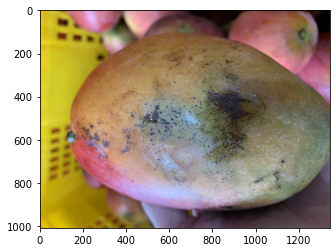

In [2]:
img_path = glob('img/*.jpg')
json_path = glob('annotation/*.json')

img = cv2.imread(img_path[0])[:, :, ::-1]
plt.imshow(img)

# 看一下 JSON 資料

In [3]:
data = json.load(open(json_path[0]))
data

{'version': '3.6.10',
 'flags': {},
 'shapes': [{'label': 'mango',
   'line_color': None,
   'fill_color': None,
   'points': [[556, 224],
    [538, 261],
    [539, 326],
    [556, 366],
    [605, 441],
    [658, 492],
    [700, 526],
    [738, 550],
    [810, 583],
    [868, 592],
    [940, 597],
    [1027, 573],
    [1086, 532],
    [1129, 479],
    [1150, 404],
    [1158, 335],
    [1142, 258],
    [1124, 217],
    [1087, 173],
    [1036, 135],
    [942, 97],
    [859, 89],
    [803, 94],
    [746, 109],
    [689, 131],
    [634, 155],
    [601, 179]],
   'shape_type': 'polygon'}],
 'lineColor': [0, 255, 0, 128],
 'fillColor': [255, 0, 0, 128],
 'imagePath': '05065.jpg',
 'imageData': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCALQBQADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBA

# 看一下圖片 寬、高

In [4]:
height = data['imageHeight']
width = data['imageWidth']
height, width

(720, 1280)

# 逐筆畫出 mask 物件

(620,)


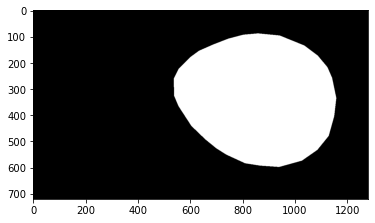

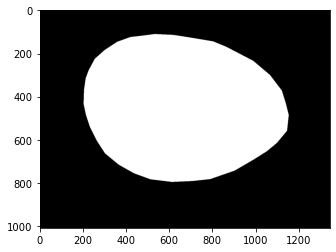

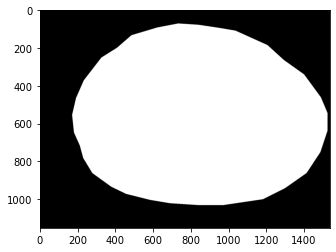

In [5]:
# Draw Object mask

mask_list = []
for i, path in enumerate(json_path):
    data = json.load(open(path))
    height = data['imageHeight']
    width = data['imageWidth']
    mask = np.zeros((height, width))
    
    for shape in data['shapes']:
        points = shape['points']
        cv2.fillPoly(mask, np.array([points], dtype=np.int32), 255) # fill object with 255
        
    mask_list.append(mask)
        
mask_list = np.array(mask_list)
print(mask_list.shape)

for m in mask_list[: 3]:
    plt.imshow(m, cmap='gray')
    plt.show()

# 進行背景反轉

In [6]:
# update backgroud mask
for i in range(len(mask_list)):
    mask_list[i] = 255 - mask_list[i]

# 看一下反轉後的 mask

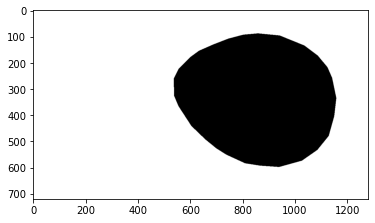

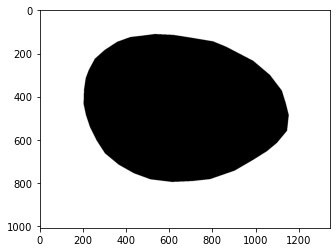

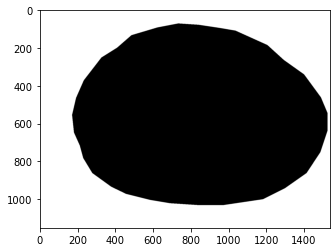

In [7]:
# show all masks
for m in mask_list[: 3]:
    plt.imshow(m, cmap='gray')
    plt.show()

# 看一下檔案名稱

In [8]:
# Get File name
filename_img = os.path.split(img_path[0])[-1]
filename = filename_img.split('.')[0]
filename

'00002'

# 儲存 Mask 檔案

In [9]:
# Save Mask File
for i, m in enumerate(mask_list):
    filename_img = os.path.split(json_path[i])[-1]
    filename = filename_img.split('.')[0]
    path_save = os.path.join('mask', f'{filename}_mask_{i}.png')
    cv2.imwrite(path_save, m)